In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/ptb-xl-tcc')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [ ]:
X_train = np.load('/content/drive/MyDrive/ptb-xl-tcc/outfile_X_train.npy', allow_pickle=True)
X_test = np.load('/content/drive/MyDrive/ptb-xl-tcc/outfile_X_test.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/ptb-xl-tcc/outfile_y_train.npy', allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/ptb-xl-tcc/outfile_y_test.npy', allow_pickle=True)

In [ ]:
X_train.shape

(19603, 1000, 12)

In [ ]:
y_train.shape

(19603,)

In [ ]:
X_test.shape

(2198, 1000, 12)

In [ ]:
y_test.shape

(2198,)

In [ ]:
y_test

array([list(['NORM']), list(['NORM']), list(['NORM']), ...,
       list(['NORM']), list(['CD']), list(['MI'])], dtype=object)

In [ ]:
def remover(X,y):
     aux = []
     ret = 0
     x_aux = []
     y_aux = []
     for i in range(len(y)):
         if y[i] != []:
           y_aux.append(y[i])
           x_aux.append(X[i])
     return np.array(x_aux), np.array(y_aux)

In [ ]:
X_train,y_train = remover(X_train,y_train)
X_test,y_test = remover(X_test,y_test)

<ipython-input-52-c44d1cdeb708>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(x_aux), np.array(y_aux)


In [ ]:
print("X_train:" + str(X_train.shape) + "; y_train:" + str(y_train.shape) + "; X_test:" + str(X_test.shape) + "; y_test:" + str(y_test.shape))

X_train:(19237, 1000, 12); y_train:(19237,); X_test:(2159, 1000, 12); y_test:(2159,)


In [ ]:
X_train

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

Não há amostras da classe NORM no conjunto de dados.


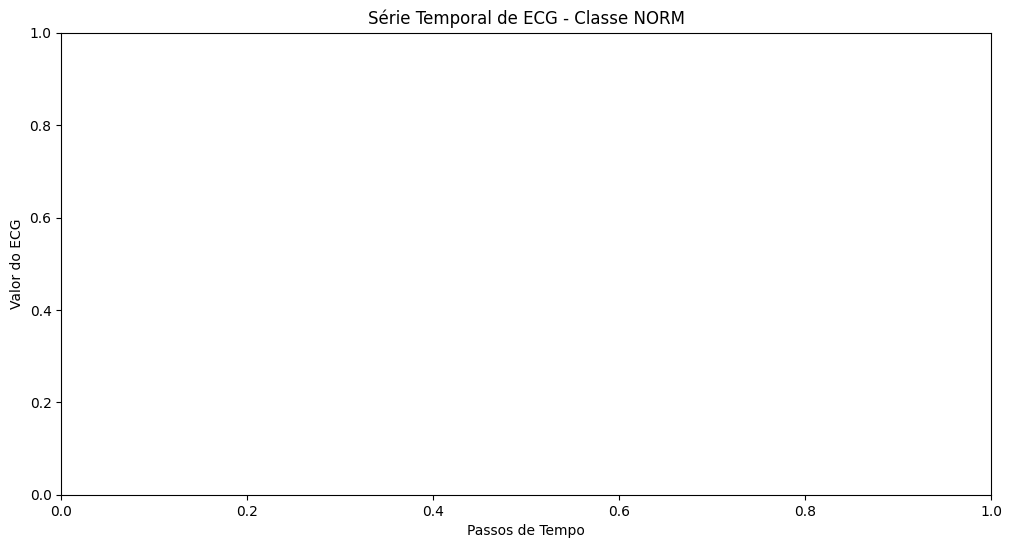

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para plotar a série temporal da classe 'normal'
def plot_serie_temporal_normal(X, y, classe='CD'):
    # Configuração do gráfico
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Série Temporal de ECG - Classe {classe}')
    plt.xlabel('Passos de Tempo')
    plt.ylabel('Valor do ECG')

    # Encontrar índices das amostras da classe 'normal'
    indices_classe_normal = np.where(y == classe)[0]

    # Se há amostras da classe 'normal', selecione uma aleatória para plotar
    if len(indices_classe_normal) > 0:
        indice_amostra_normal = np.random.choice(indices_classe_normal)
        ax.plot(np.arange(X.shape[1]), X[indice_amostra_normal, :, 0], label=f'Amostra {indice_amostra_normal}', color='b', linewidth=2.0)
        ax.legend()
        ax.grid(True)

        # Define os limites e rótulos do eixo y
        ax.set_ylim(-2.5, 2.5)
        ax.set_yticks(np.arange(-2.5, 3, 0.5))
        ax.set_ylabel('Valor do ECG')

        # Exibe o gráfico
        plt.show()
    else:
        print(f'Não há amostras da classe {classe} no conjunto de dados.')


# Plota uma amostra da classe 'normal'
plot_serie_temporal_normal(X_train, y_train, classe='NORM')


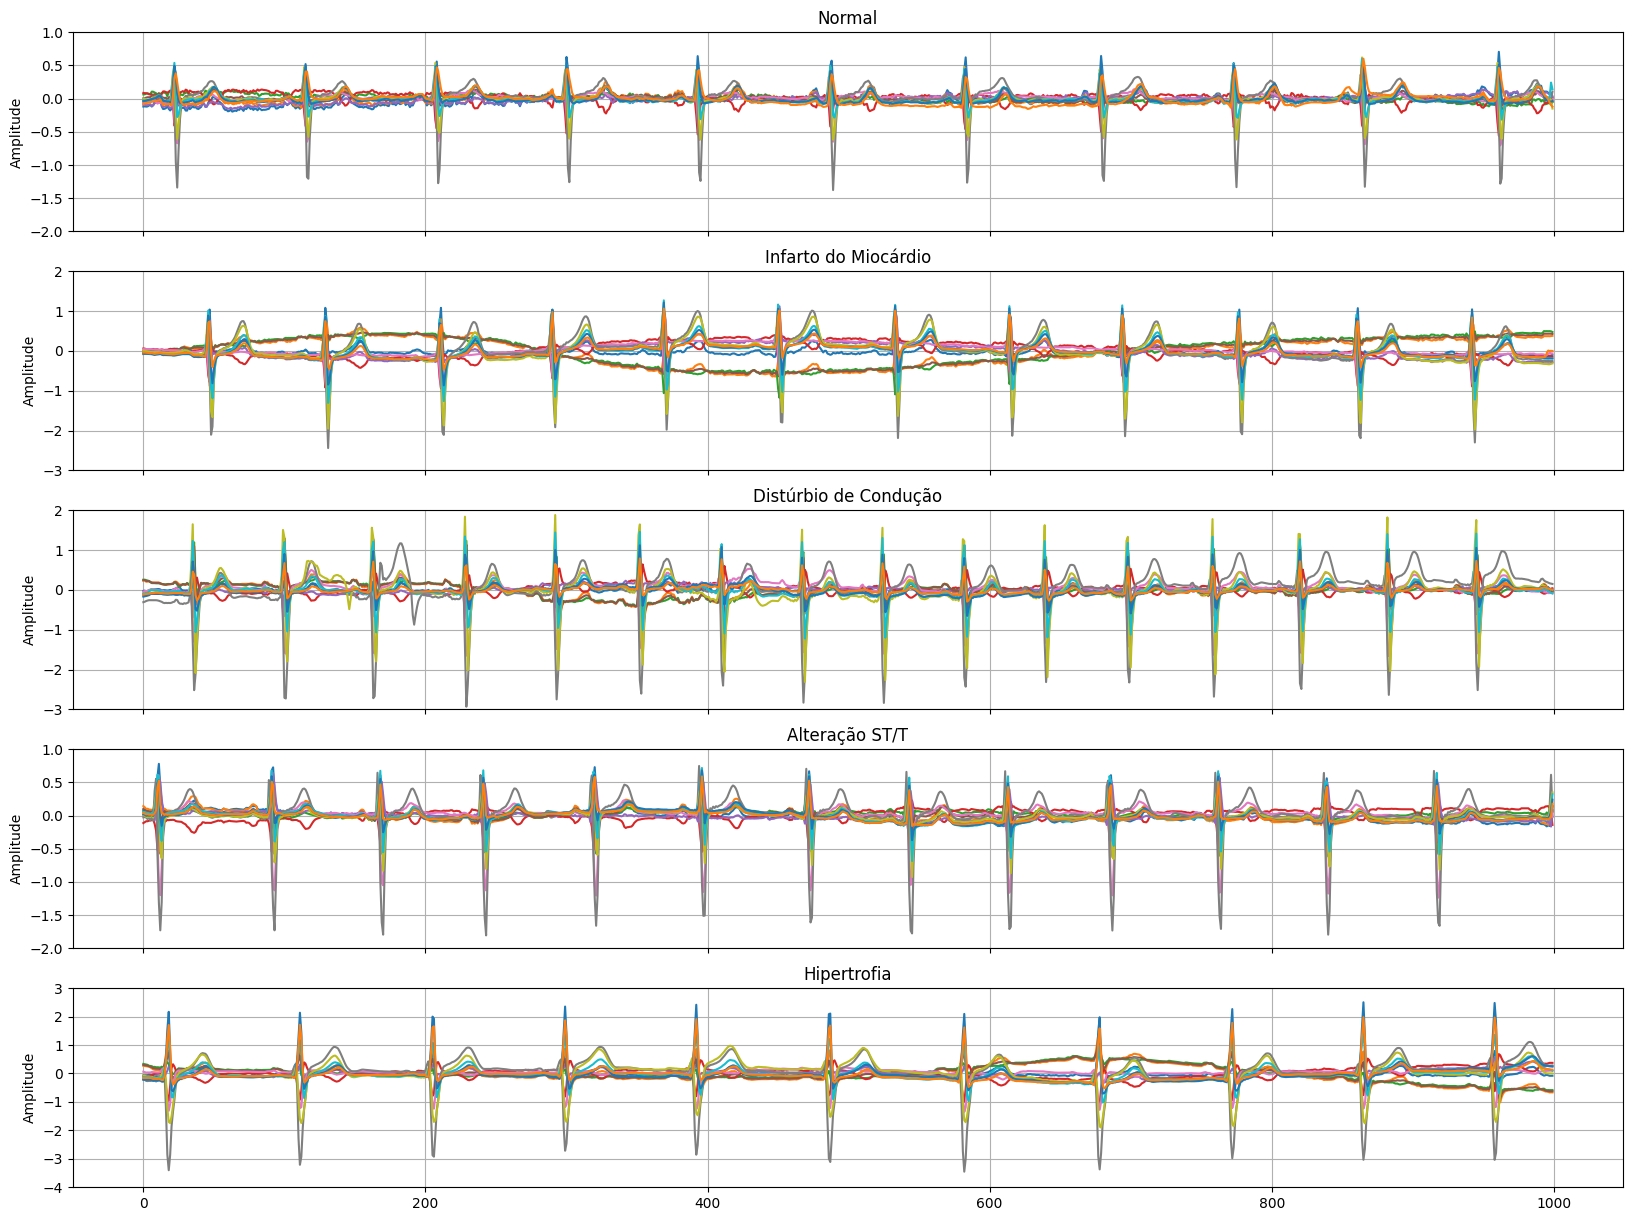

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5,1,figsize=(20, 15), sharex=True)
#plt.title('Série Temporal de ECG')
#plt.xlabel('Passos de Tempo')
#plt.ylabel('Amplitude')
ax[0].plot(id_res[3])
ax[0].set_title('Normal')
ax[0].set_ylim(-2,1)
ax[0].set_ylabel('Amplitude')
ax[0].grid()
ax[2].plot(id_res[0])
ax[2].set_title('Distúrbio de Condução')
ax[2].set_ylim(-3,2)
ax[2].set_ylabel('Amplitude')
ax[2].grid()
ax[4].plot(id_res[1])
ax[4].set_title('Hipertrofia')
ax[4].set_ylim(-4,3)
ax[4].set_ylabel('Amplitude')
ax[4].grid()
ax[1].plot(id_res[2])
ax[1].set_title('Infarto do Miocárdio')
ax[1].set_ylim(-3,2)
ax[1].set_ylabel('Amplitude')
ax[1].grid()
ax[3].plot(id_res[4])
ax[3].set_title('Alteração ST/T')
ax[3].set_ylim(-2,1)
ax[3].set_ylabel('Amplitude')
ax[3].grid()

In [ ]:
fig.savefig("teste.png", bbox_inches='tight')

In [ ]:
fig.savefig("ecg_superclasses.png", bbox_inches='tight')

In [ ]:
!pwd

/content/drive/MyDrive/ptb-xl-tcc


In [ ]:
def find(vetor_procurado, conjunto_de_dados):
  for idx,vetor in enumerate(conjunto_de_dados):
        if np.array_equal(vetor_procurado, vetor):
            return idx
  return -1

vetor_procurado1 = [1,0,0,0,0] #CD
vetor_procurado2 = [0,1,0,0,0] #HYP
vetor_procurado3 = [0,0,1,0,0] #MI
vetor_procurado4 = [0,0,0,1,0] #NORM
vetor_procurado5 = [0,0,0,0,1] #STTC

res = []
res.append(find(vetor_procurado1,y_train))
res.append(find(vetor_procurado2,y_train))
res.append(find(vetor_procurado3,y_train))
res.append(find(vetor_procurado4,y_train))
res.append(find(vetor_procurado5,y_train))

In [ ]:
print(res)

[30, 28, 7, 0, 20]


In [ ]:
id_res = X_train[res]

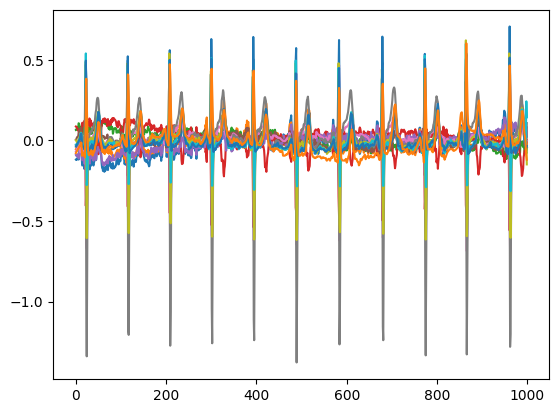

In [ ]:
plt.plot(X_train[0])

In [ ]:
def multi_hot_encoding(y):
    #Obter dados categóricos
    y_encoded = np.array(y)

    # Criar uma instância do codificador multi-hot
    encoder = MultiLabelBinarizer()

    # Aplicar a codificação multi-hot aos dados
    y_encoded_ = encoder.fit_transform(y_encoded)

    return y_encoded_

In [ ]:
y_train = multi_hot_encoding(y_train)
y_test = multi_hot_encoding(y_test)

In [ ]:
y_train

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
y_train.shape

(19237, 5)

In [ ]:
y_test

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
y_test.shape

(2159, 5)

In [ ]:
import numpy as np

# Função para verificar se um vetor está presente no conjunto de dados
def vetor_presente(vetor_procurado, conjunto_de_dados):
    for vetor in conjunto_de_dados:
        if np.array_equal(vetor_procurado, vetor):
            return True
    return False

# Exemplo de conjunto de dados (usando NumPy arrays)
conjunto_de_dados = y_train

# Vetor a ser procurado
vetor_procurado = np.array([1, 0, 0, 1, 0])

# Verifica se o vetor está presente no conjunto de dados
if vetor_presente(vetor_procurado, conjunto_de_dados):
    print("O vetor está presente no conjunto de dados.")
else:
    print("O vetor NÃO está presente no conjunto de dados.")


O vetor está presente no conjunto de dados.


In [ ]:
import numpy as np

# Função para contar a quantidade de vezes que um vetor está presente no conjunto de dados
def contar_ocorrencias(vetor_procurado, conjunto_de_dados):
    contador = 0
    for vetor in conjunto_de_dados:
        if np.array_equal(vetor_procurado, vetor):
            contador += 1
    return contador

# Exemplo de conjunto de dados (usando NumPy arrays)
conjunto_de_dados = y_train

# Vetor a ser procurado
vetor_procurado = np.array([1, 0, 0, 1, 0])

# Conta as ocorrências do vetor no conjunto de dados
ocorrencias = contar_ocorrencias(vetor_procurado, conjunto_de_dados)

# Exibe o resultado
print(f"O vetor está presente {ocorrencias} vezes no conjunto de dados.")


O vetor está presente 362 vezes no conjunto de dados.


In [ ]:
#Definindo a arquitetura da rede neural LSTM
model = Sequential()
#Adicionando camada LSTM com 12 unidades
model.add(LSTM(units=12, input_shape=X_train.shape[1:], return_sequences=True))
#Adicionando uma camada de Dropout para regularização
model.add(Dropout(0.2))
#Adicionando uma camada de Batch Normalization para normalizar as saidas da camada anterior
model.add(BatchNormalization())
model.add(LSTM(5))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#Adicionando uma camada densa com ativação sigmoid para a classificação multiclasse (5 classes)
model.add(Dense(5, activation='sigmoid'))

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:G

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy",
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
              ])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1000, 12)          1200      
                                                                 
 dropout_1 (Dropout)         (None, 1000, 12)          0         
                                                                 
 batch_normalization_1 (Bat  (None, 1000, 12)          48        
 chNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 5)                 360       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 batch_normalization_2 (Bat  (None, 5)                 20        
 chNormalization)                                     

In [ ]:
#Define o retorno de chamada ModelCheckpoint
checkpoint = ModelCheckpoint('melhor_modelo_LSTM_3.h5',
                             monitor='val_accuracy',  #Monitorar a partir da acurácia
                             verbose=1,
                             save_best_only=True,
                             mode='max')

#Treinamento do modelo com o retorno de chamada ModelCheckpoint
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    callbacks=[checkpoint]  #Adiciona o retorno de chamada ao treinamento
)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Opt

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


A saída de streaming foi truncada nas últimas 5000 linhas.
Executing op __inference_train_function_124316 in device /job:localhost/replica:0/task:0/device:GPU:0
236/542 [============>.................] - ETA: 26s - loss: 0.4608 - accuracy: 0.5117 - precision_1: 0.6737 - recall_1: 0.3542Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_124316 in device /job:localhost/replica:0/task:0/device:GPU:0
237/542 [============>.................] - ETA: 26s - loss: 0.4612 - accuracy: 0.5111 - precision_1: 0.6730 - recall_1: 0.3538Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_124316 in device /job:localhost/replica:0/task:0/device:GPU:0
238/542 [============>.................] - ETA: 26s - loss: 0.4

In [ ]:
history.history

{'loss': [0.5461575984954834,
  0.5150948762893677,
  0.4653257727622986,
  0.4398997128009796,
  0.4177647829055786,
  0.3928391635417938,
  0.38122597336769104,
  0.37062469124794006,
  0.36894097924232483,
  0.3675467073917389,
  0.3659539818763733,
  0.36537662148475647,
  0.3562178909778595,
  0.35662412643432617,
  0.35245439410209656,
  0.35385584831237793,
  0.3571038246154785,
  0.34947794675827026,
  0.35047444701194763,
  0.3446807563304901,
  0.3390921950340271,
  0.34047216176986694,
  0.343122273683548,
  0.449390172958374,
  0.450700968503952,
  0.45090624690055847,
  0.47601667046546936,
  0.4585517346858978,
  0.4543132483959198,
  0.45151299238204956],
 'accuracy': [0.41494831442832947,
  0.4563622772693634,
  0.4878992736339569,
  0.5084040760993958,
  0.574077308177948,
  0.5922716856002808,
  0.5951019525527954,
  0.6076358556747437,
  0.6083289980888367,
  0.6071738004684448,
  0.6163576245307922,
  0.612949788570404,
  0.6265234351158142,
  0.623115599155426,
  0

In [ ]:
model_LSTM = tf.keras.models.load_model("melhor_modelo_LSTM_3.h5")

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executin

In [ ]:
test_results = model_LSTM.evaluate(X_test, y_test)
print(f'Test Loss: {test_results[0]:.4f}, Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]}, Test Recall: {test_results[3]}')

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Option

In [ ]:
y_pred = model_LSTM.predict(X_test)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op 

In [ ]:
y_pred

array([[0.12402757, 0.01931073, 0.05057177, 0.84842956, 0.02351877],
       [0.2136921 , 0.04303197, 0.07070047, 0.71869546, 0.03574048],
       [0.11693195, 0.05623666, 0.06745151, 0.6871633 , 0.09465081],
       ...,
       [0.28244415, 0.08990698, 0.09232766, 0.54306024, 0.07074246],
       [0.51088095, 0.1342696 , 0.20923096, 0.25724933, 0.09464818],
       [0.3333469 , 0.12342627, 0.39418536, 0.15437157, 0.24093135]],
      dtype=float32)

In [ ]:
#define limiar(threshold) para converter as previsões contínuas em rótulos binários
threshold = 0.3

#aplicando o limiar às previsões
y_pred_ = (y_pred > threshold).astype(int)

print(classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       497
           1       0.58      0.45      0.51       262
           2       0.64      0.67      0.65       551
           3       0.75      0.95      0.84       963
           4       0.66      0.79      0.72       521

   micro avg       0.69      0.77      0.73      2794
   macro avg       0.67      0.70      0.68      2794
weighted avg       0.69      0.77      0.72      2794
 samples avg       0.72      0.78      0.73      2794



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(y_test,y_pred_)
print(accuracy)

0.5409911996294581


In [ ]:
#define limiar(threshold) para converter as previsões contínuas em rótulos binários
threshold = 0.5

#aplicando o limiar às previsões
y_pred_ = (y_pred > threshold).astype(int)

print(classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

           0       0.87      0.49      0.62       497
           1       0.79      0.14      0.24       262
           2       0.86      0.34      0.49       551
           3       0.82      0.85      0.84       963
           4       0.83      0.58      0.68       521

   micro avg       0.84      0.57      0.68      2794
   macro avg       0.83      0.48      0.57      2794
weighted avg       0.84      0.57      0.65      2794
 samples avg       0.67      0.61      0.62      2794



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(y_test,y_pred_)
print(accuracy)

0.5229272811486799


In [ ]:
#define limiar(threshold) para converter as previsões contínuas em rótulos binários
threshold = 0.75

#aplicando o limiar às previsões
y_pred_ = (y_pred > threshold).astype(int)

print(classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

           0       0.95      0.33      0.49       497
           1       0.00      0.00      0.00       262
           2       1.00      0.01      0.01       551
           3       0.89      0.68      0.77       963
           4       0.85      0.19      0.32       521

   micro avg       0.89      0.33      0.48      2794
   macro avg       0.74      0.24      0.32      2794
weighted avg       0.83      0.33      0.41      2794
 samples avg       0.43      0.38      0.40      2794



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(y_test,y_pred_)
print(accuracy)

0.3446039833256137


In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63       497
           1       0.00      0.00      0.00       187
           2       0.53      0.39      0.45       317
           3       0.73      0.94      0.82       916
           4       0.38      0.72      0.50       242

    accuracy                           0.65      2159
   macro avg       0.50      0.51      0.48      2159
weighted avg       0.63      0.65      0.61      2159



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
